In [1]:
import pandas as pd
# 数据加载
train = pd.read_csv('/content/drive/My Drive/datasets/jetrail/train.csv')
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [2]:
# 时间格式转换
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Datetime
# 去掉ID和Datetime
train.drop(['ID','Datetime'], axis=1, inplace=True)
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [3]:
daily_train = train.resample('D').sum()
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
train.drop(['Count'], axis=1, inplace=True)
train.head()

""
Datetime
2012-08-25 00:00:00
2012-08-25 01:00:00
2012-08-25 02:00:00
2012-08-25 03:00:00
2012-08-25 04:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


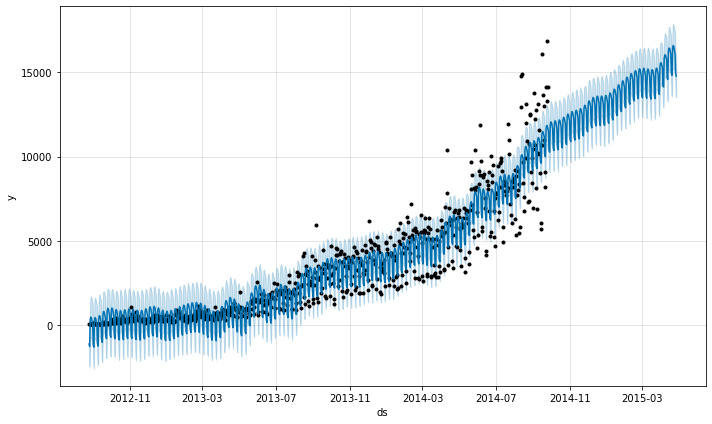

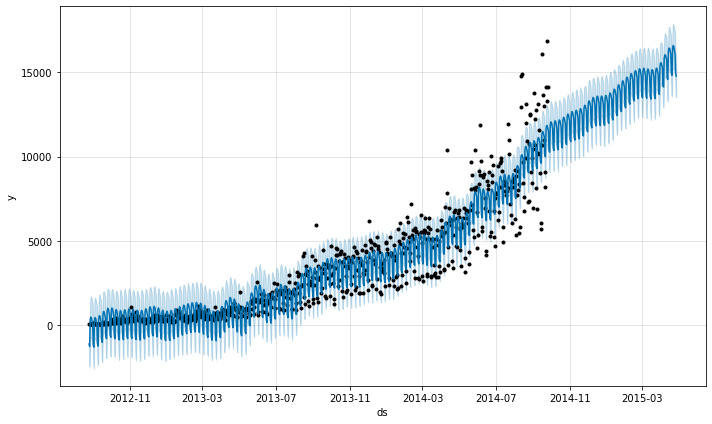

In [5]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
model.fit(daily_train)
# 预测未来7个月，213天
future = model.make_future_dataframe(periods=213)
forecast = model.predict(future)
model.plot(forecast)

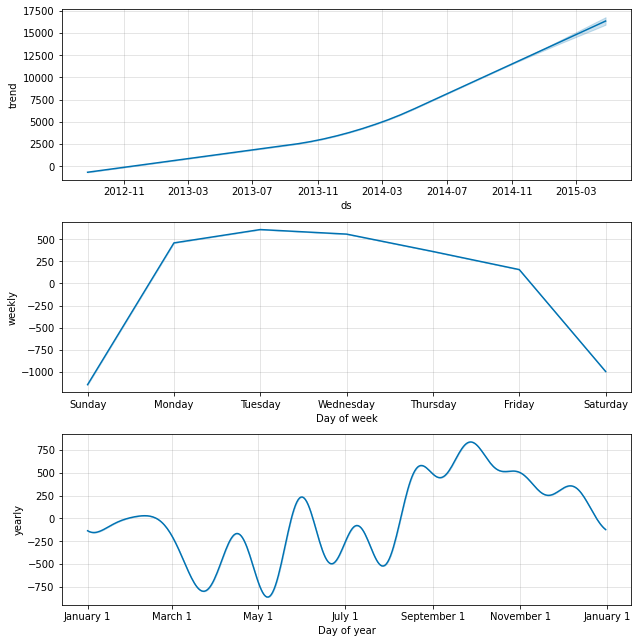

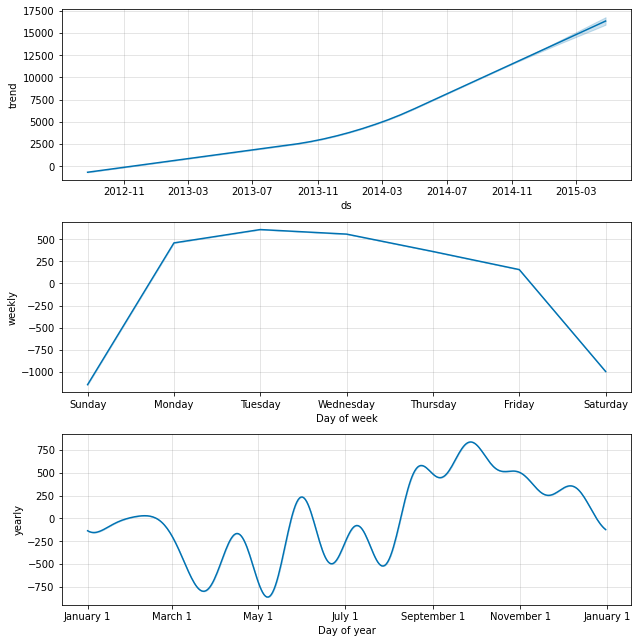

In [6]:
model.plot_components(forecast)